<a href="https://colab.research.google.com/github/Vita1ik/Machine_Learning/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

plt.style.use('seaborn-v0_8')

In [22]:
calls_data = pd.read_csv('motorbike_ambulance_calls.csv')

In [ ]:
calls_data.describe().T

In [ ]:
calls_data.shape

(17379, 15)

In [ ]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


In [ ]:
pd.concat([calls_data.head(1), calls_data.tail(1)])

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
17378,17379,12/31/12,spring,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,49


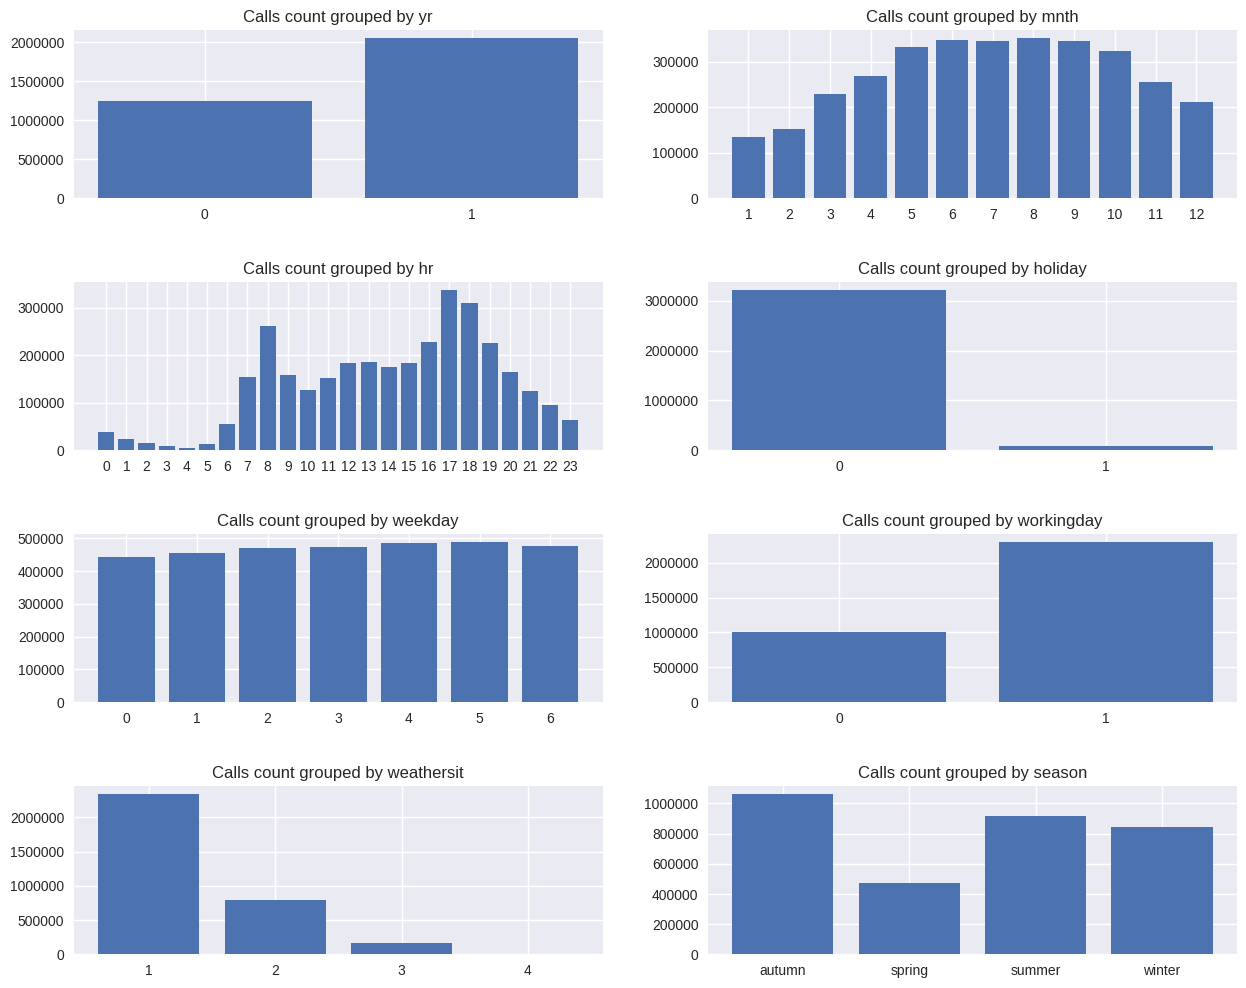

In [ ]:
categorical_features = ['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'season']
categorical_calls_data = calls_data[categorical_features]
fig, axes = plt.subplots(4, 2, figsize=(15, 12))

for ax, feature in zip(axes.flatten(), categorical_features):
    grouped_calls = calls_data.groupby(feature)['cnt'].sum()
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.bar(grouped_calls.index, grouped_calls.values)
    ax.set_xticks(grouped_calls.index)
    ax.set_title(f'Calls count grouped by {feature}')

plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()


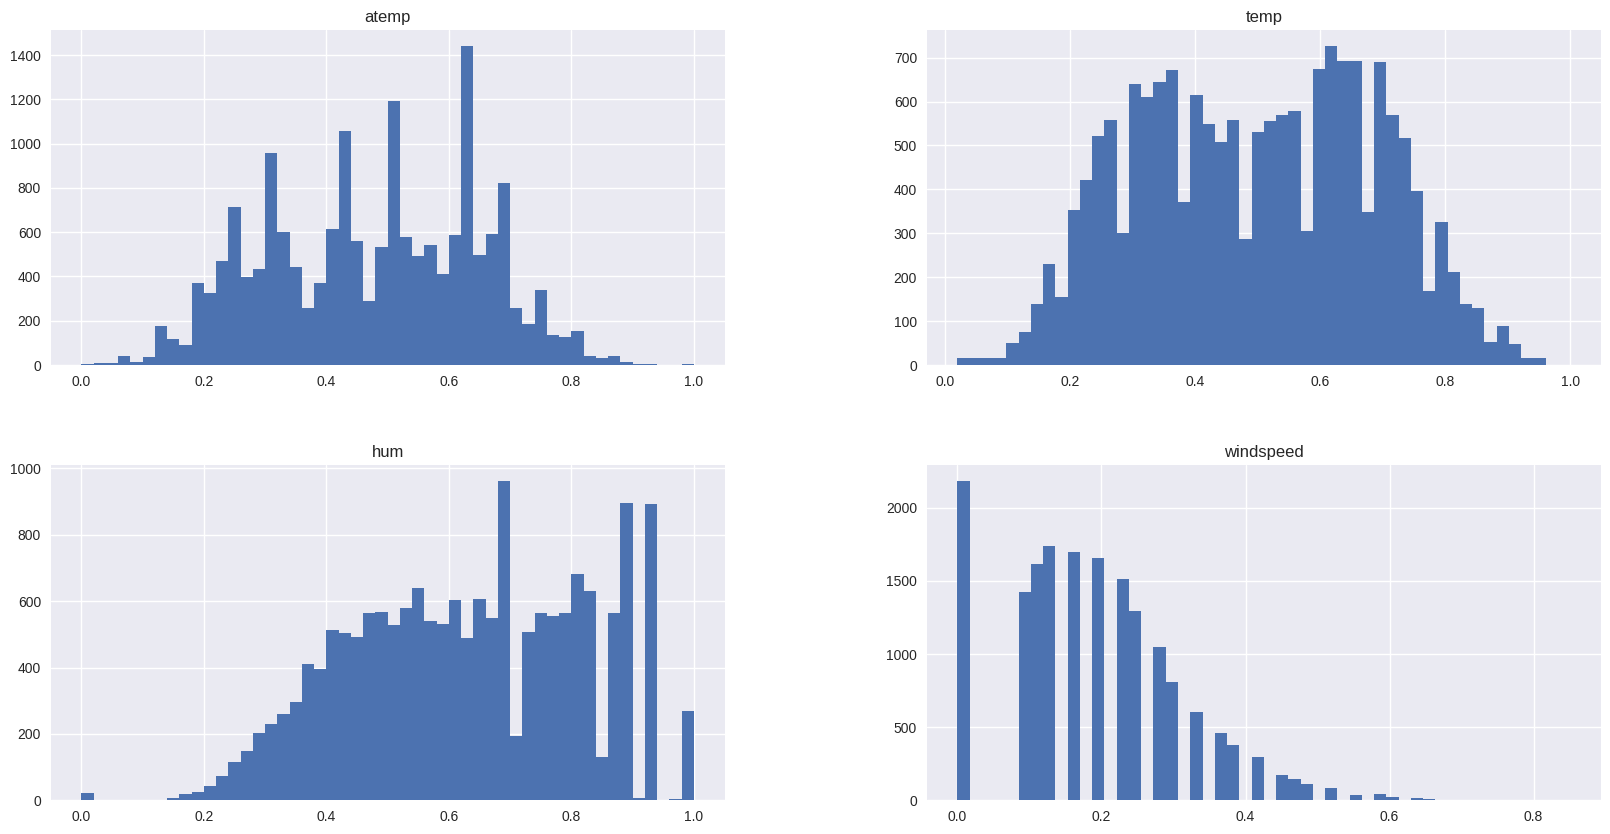

In [ ]:
calls_data_numerical = calls_data[['atemp', 'temp', 'hum', 'windspeed', 'cnt']]
calls_data_numerical.drop('cnt', axis=1).hist(figsize=(20,10), bins=50)
plt.show()


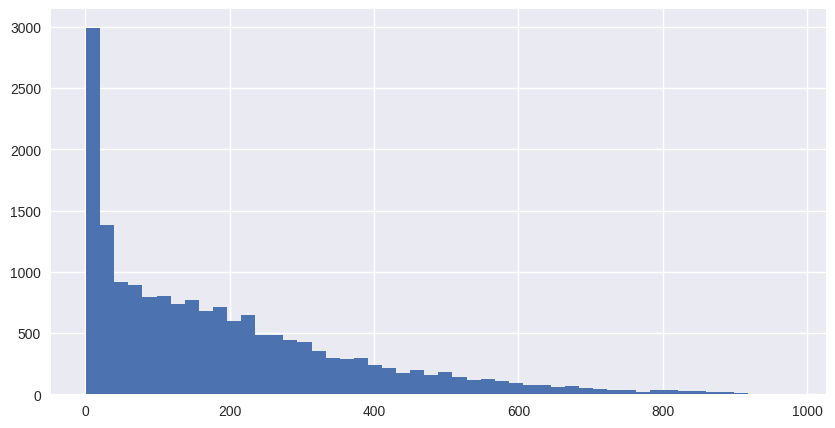

In [ ]:
calls_data_numerical.cnt.hist(figsize=(10,5), bins=50)
plt.show()

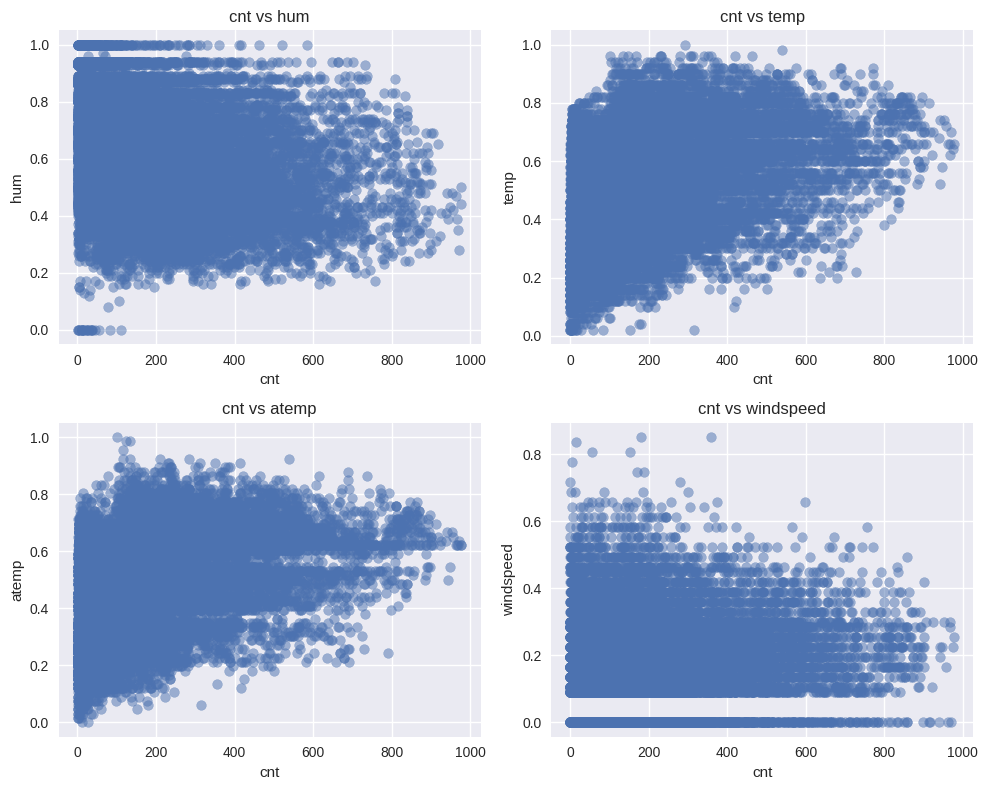

In [ ]:
columns_to_plot = ['hum', 'temp', 'atemp', 'windspeed']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for ax, column in zip(axes, columns_to_plot):
    ax.scatter(calls_data_numerical.cnt, calls_data_numerical[column], alpha=0.5)
    ax.set_xlabel('cnt')
    ax.set_ylabel(column)
    ax.set_title(f'cnt vs {column}')

plt.tight_layout()
plt.show()

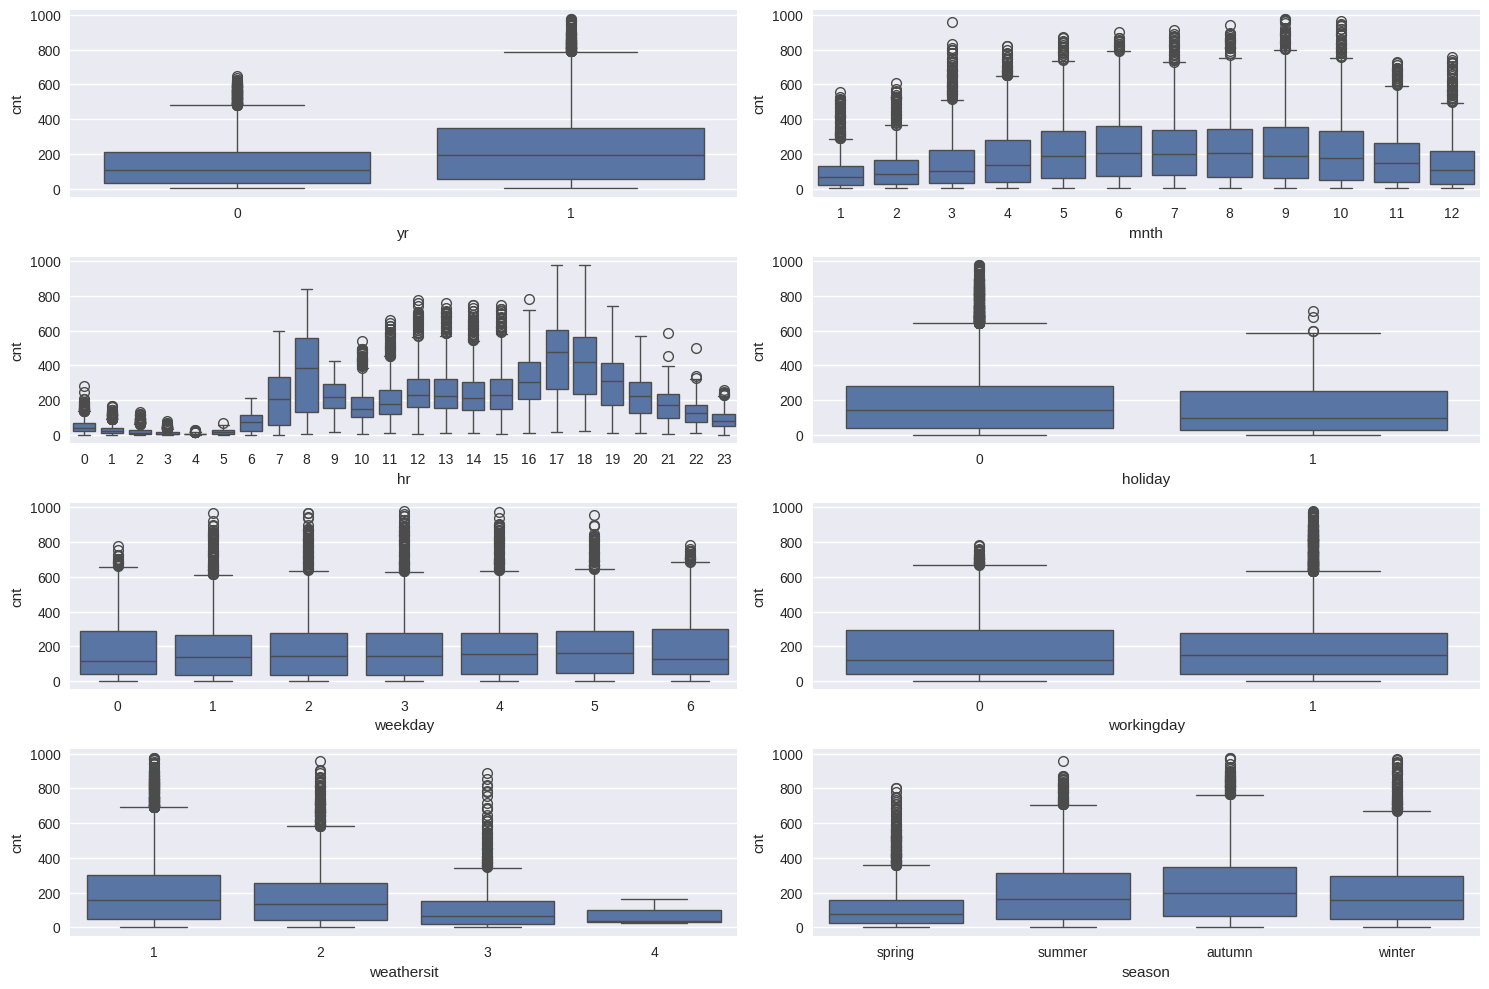

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()

for var, subplot in zip(categorical_calls_data, axes):
  sns.boxplot(x=var, y='cnt', data=calls_data, ax=subplot)

plt.tight_layout()
plt.show()

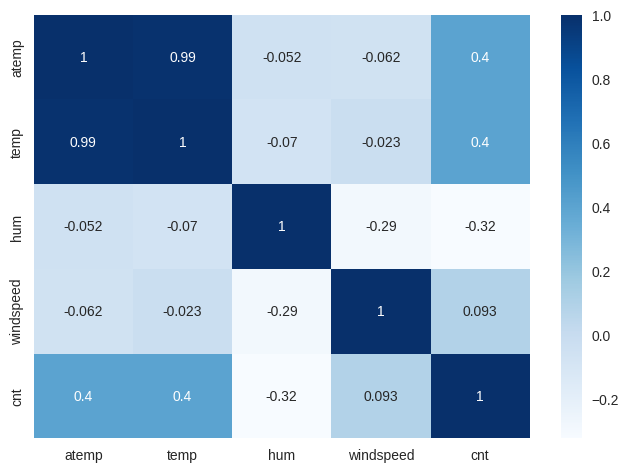

In [ ]:
pearson_corr = calls_data_numerical.corr(method='pearson')
sns.heatmap(pearson_corr, cmap='Blues', annot=True)
plt.show()

In [32]:
data_for_comparation = calls_data[['yr', 'mnth', 'weekday', 'workingday']].copy()
calls_data['date'] = pd.to_datetime(calls_data['date'], format='%m/%d/%y')
calls_data['day'] = calls_data['date'].dt.day

data_for_comparation['date'] = calls_data['date']
data_for_comparation['year'] = [0 if year == 2011 else 1 for year in calls_data['date'].dt.year]
data_for_comparation['month'] = calls_data['date'].dt.month
data_for_comparation['day'] = calls_data['date'].dt.day
data_for_comparation['day_of_week'] = calls_data['date'].dt.dayofweek + 1
data_for_comparation

# Check if data in date column are the same as in mnth, yr, weekday
print(data_for_comparation['mnth'][0] == data_for_comparation['month'][0])
print(data_for_comparation['yr'][0] == data_for_comparation['year'][0])
print(data_for_comparation['weekday'][0] == data_for_comparation['day_of_week'][0])

True
True
True


In [33]:
calls_data.drop(['date', 'season'], axis=1, inplace=True)